<a href="https://colab.research.google.com/github/slouxjiwon/ITB/blob/main/1910621_%EC%9D%B4%EC%A7%80%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np  
from scipy import sparse

In [ ]:
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

In [ ]:
fpath = 'https://raw.githubusercontent.com/ykjoy/mining/main/chipotle.csv'

In [ ]:
#리스트 출력
df = pd.read_csv(fpath)
print(type(df))  
display(df) 

<class 'pandas.core.frame.DataFrame'>


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


(1) 가장 잘 팔리지 않은 (주문량이 가장 적은) 메뉴 10개를 보여 주세요.

In [ ]:
item_count = df['item_name'].value_counts()[-11:-1] #내림차 순이므로 뒤에서 10번째~1번째까지 출력
print(item_count)

Carnitas Crispy Tacos                7
Veggie Salad                         6
Carnitas Salad Bowl                  6
Burrito                              6
Steak Salad                          4
Crispy Tacos                         2
Salad                                2
Bowl                                 2
Chips and Mild Fresh Tomato Salsa    1
Veggie Crispy Tacos                  1
Name: item_name, dtype: int64


In [ ]:
item_list = item_count.index.tolist()
item_qty = item_count.values.tolist()

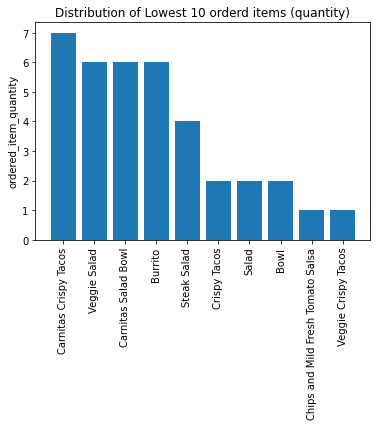

In [ ]:
plt.bar(item_list, item_qty, align='center')
plt.ylabel('ordered_item_quantity')
plt.title('Distribution of Lowest 10 orderd items (quantity)')
plt.xticks(rotation= 90) 
plt.show()

(2) 가격이 가장 저렴한 메뉴 5개를 보여주세요.

In [ ]:
display(df['item_price'].head())
df['item_price'] = df['item_price'].apply(lambda x: float(x[1:])) #???? 왜 여기서 플로트 에러가 뜨는 지 모르겠어요

display(df['item_price'].head())
df.describe()

연습2: 공공 데이터 이용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
covid = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/서울시 코로나19 백신 예방접종 현황.csv", encoding='cp949')

In [ ]:
display(covid.head())
print(covid.info()) 
print(covid.describe()) 

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%)
0,2022.10.11,9401888,25,8340612,88.7,59,8262506,87.9,488.0,6066423.0,64.5,568.0,1253111.0,13.3
1,2022.10.10,9401888,64,8340201,88.7,103,8262054,87.9,689.0,6065512.0,64.5,1973.0,1252410.0,13.3
2,2022.10.06,9401888,31,8340995,88.7,72,8262726,87.9,426.0,6064823.0,64.5,821.0,1250437.0,13.3
3,2022.10.05,9401888,35,8341102,88.7,67,8262788,87.9,450.0,6064480.0,64.5,774.0,1249608.0,13.3
4,2022.10.04,9401888,31,8341073,88.7,69,8262728,87.9,456.0,6064064.0,64.5,756.0,1248848.0,13.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         499 non-null    object 
 1   접종대상자       499 non-null    int64  
 2   당일 1차접종자 수  499 non-null    int64  
 3   1차접종 누계     499 non-null    int64  
 4   1차접종률(%)    499 non-null    float64
 5   당일 2차접종자 수  499 non-null    int64  
 6   2차접종 누계     499 non-null    int64  
 7   2차접종률(%)    499 non-null    float64
 8   당일 3차접종자 수  324 non-null    float64
 9   3차접종 누계     324 non-null    float64
 10  3차접종률(%)    308 non-null    float64
 11  당일 4차접종자 수  170 non-null    float64
 12  4차접종 누계     170 non-null    float64
 13  4차접종률(%)    170 non-null    float64
dtypes: float64(8), int64(5), object(1)
memory usage: 54.7+ KB
None
              접종대상자     당일 1차접종자 수       1차접종 누계    1차접종률(%)     당일 2차접종자 수  \
count  4.990000e+02     499.000000  4.990000e+02  499.000000     499.000000   
mean   7.8706

In [ ]:
last_day = covid.loc[0]
print(last_day)

접종일           2022.10.11
접종대상자            9401888
당일 1차접종자 수            25
1차접종 누계          8340612
1차접종률(%)            88.7
당일 2차접종자 수            59
2차접종 누계          8262506
2차접종률(%)            87.9
당일 3차접종자 수         488.0
3차접종 누계        6066423.0
3차접종률(%)            64.5
당일 4차접종자 수         568.0
4차접종 누계        1253111.0
4차접종률(%)            13.3
Name: 0, dtype: object


In [ ]:
#여..기서 당일 접종률만 뽑아서 시각화하고 싶은데 어떻게 해야할지 모르겠어요... 